## Загрузка данных

In [1]:

!pip install phik 
!pip install shap
!pip install --upgrade scikit-learn -q


In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas  as pd
import phik
import seaborn as sns
import shap

from phik import phik_matrix
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
                        
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler
                                  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
pd.set_option('display.float_format', '{:,.2f}'.format)

In [3]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', decimal = ',', sep =';')

In [4]:
def display_dataset_info(data):

    print("Первые пять строк датасета:")
    display(data.head())
    print("\n")
    
    print("Размер датасета:")
    print(f"Количество строк: {data.shape[0]}, Количество столбцов: {data.shape[1]}")
    print("\n")
    

    print("Информация о датасете:")
    data.info()
    print("\n")
    
    print("Количество пропущенных значений по столбцам:")
    print(data.isnull().sum())
    print("\n")
    
    print("Дубликаты:") 
    print(data.duplicated().sum())
    print("\n")

    



In [5]:
display_dataset_info(market_file)

Первые пять строк датасета:


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.40,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.40,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.90,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.20,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.10,3,1064,0.94,Товары для детей,3,2,3,2




Размер датасета:
Количество строк: 1300, Количество столбцов: 13


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоп

In [6]:
display_dataset_info(market_money)

Первые пять строк датасета:


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.00
1,215348,текущий_месяц,"3,293.10"
2,215348,предыдущий_месяц,0.00
3,215349,препредыдущий_месяц,"4,472.00"
4,215349,текущий_месяц,"4,971.60"




Размер датасета:
Количество строк: 3900, Количество столбцов: 3


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


Количество пропущенных значений по столбцам:
id         0
Период     0
Выручка    0
dtype: int64


Дубликаты:
0




In [7]:
display_dataset_info(market_time)

Первые пять строк датасета:


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13




Размер датасета:
Количество строк: 2600, Количество столбцов: 3


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


Количество пропущенных значений по столбцам:
id        0
Период    0
минут     0
dtype: int64


Дубликаты:
0




In [8]:
display_dataset_info(money)

Первые пять строк датасета:


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21




Размер датасета:
Количество строк: 1300, Количество столбцов: 2


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Количество пропущенных значений по столбцам:
id         0
Прибыль    0
dtype: int64


Дубликаты:
0




##### Промежуточные выводы:

Загрузили и первично осмотрели датасеты. 
* market_file: 1300 строк, 13 столбцов. Нет пропусков, нужно заменить некоторые названия, типы данных корректные, явных дубликатов нет.
* market_money: 3900 строк, 3 столбца. Нет пропусков,  нужно заменить некоторые названия, типы данных корректные, есть явные дубликаты.
* market_time: 2600 строк, 3 столбца. Нет пропусков,  нужно заменить некоторые названия, типы данных корректные, явных дубликатов нет.
* money: 1300 строк, 2 столбца. Нет пропусков,  нужно заменить некоторые названия, типы данных корректные, явных дубликатов нет.



## Предобработка данных

In [9]:
market_file.head(10)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.40,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.40,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.90,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.20,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.10,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.30,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.10,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.70,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.20,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.90,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


In [10]:
market_file.columns = map(str.lower, market_file.columns)
market_file.columns = market_file.columns.str.replace(' ', '_')

In [11]:
print(market_file['покупательская_активность'].unique())
print(market_file['тип_сервиса'].unique())
print(market_file['разрешить_сообщать'].unique())
print(market_file['популярная_категория'].unique())

['Снизилась' 'Прежний уровень']
['премиум' 'стандартт' 'стандарт']
['да' 'нет']
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


In [12]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace(['стандартт'],'стандарт')
print(market_file['тип_сервиса'].unique())

['премиум' 'стандарт']


In [13]:
market_money.head(10)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.00
1,215348,текущий_месяц,"3,293.10"
2,215348,предыдущий_месяц,0.00
3,215349,препредыдущий_месяц,"4,472.00"
4,215349,текущий_месяц,"4,971.60"
5,215349,предыдущий_месяц,"5,216.00"
6,215350,препредыдущий_месяц,"4,826.00"
7,215350,текущий_месяц,"5,058.40"
8,215350,предыдущий_месяц,"5,457.50"
9,215351,текущий_месяц,"6,610.40"


In [14]:
market_money.columns = map(str.lower, market_money.columns)

In [15]:
print(market_money['период'].unique())

['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


In [16]:
market_money.duplicated().sum()

0

In [17]:
market_money = market_money.drop_duplicates(keep='first')

In [18]:
market_money.duplicated().sum()

0

In [19]:
market_time.head(10)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


In [20]:
market_time.columns = map(str.lower, market_time.columns)

In [21]:
print(market_time['период'].unique())

['текущий_месяц' 'предыдцщий_месяц']


In [22]:
market_time['период'] = market_time['период'].replace(['предыдцщий_месяц'],'предыдущий_месяц')
print(market_time['период'].unique())

['текущий_месяц' 'предыдущий_месяц']


In [23]:
money.head(10)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


In [24]:
money.columns = map(str.lower, money.columns)

In [25]:
# проверяем размеры датасетов
print(f'Датасет market_file:{market_file.shape}')
print(f'Датасет market_money:{market_money.shape}')
print(f'Датафрейм market_time:{market_time.shape}')
print(f'Датафрейм money:{money.shape}')

Датасет market_file:(1300, 13)
Датасет market_money:(3900, 3)
Датафрейм market_time:(2600, 3)
Датафрейм money:(1300, 2)


Все в порядке, большая часть данных на месте

###### Промежуточные выводы:

* Пропуски в датасетах не обнаружены
* Явные дубликаты обнаружены в датасете market_money в количестве 5, они были удалены.
* Сделали изменения названий столбцов: названия переведены в строчный формат, пробелы в названиях столбцов в датасете market_file заменены на нижнее подчеркивание. 
* Были найдены также неявные дубликаты в датасете market_file, они исправлены
* Исправлена опечатка в датасете market_time 
* в датасете money изменили тип данных на float, но предварительно пришлось поменять разделители десятичные на точки


## Исследовательский анализ данных

Анализируем market_file

In [26]:
market_file.describe()

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,"1,300.00","1,300.00","1,300.00","1,300.00","1,300.00","1,300.00","1,300.00","1,300.00","1,300.00"
mean,"215,997.50",4.25,4.01,601.90,0.32,3.27,2.84,4.19,8.18
std,375.42,1.01,0.70,249.86,0.25,1.36,1.97,1.96,3.98
min,"215,348.00",0.90,3.00,110.00,0.00,1.00,0.00,0.00,1.00
25%,"215,672.75",3.70,4.00,405.50,0.17,2.00,1.00,3.00,5.00
50%,"215,997.50",4.20,4.00,606.00,0.24,3.00,3.00,4.00,8.00
75%,"216,322.25",4.90,4.00,806.00,0.30,4.00,4.00,6.00,11.00
max,"216,647.00",6.60,5.00,"1,079.00",0.99,6.00,10.00,9.00,20.00


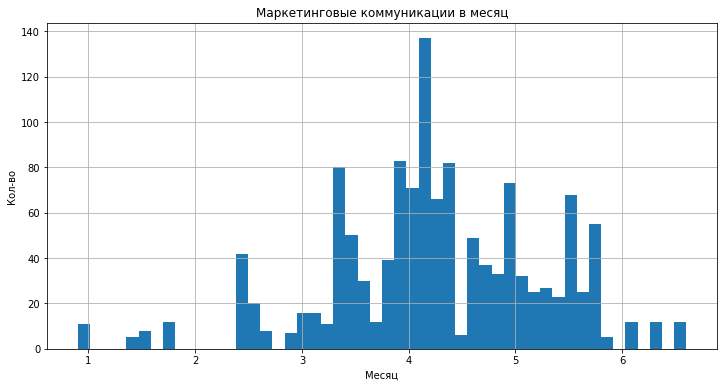

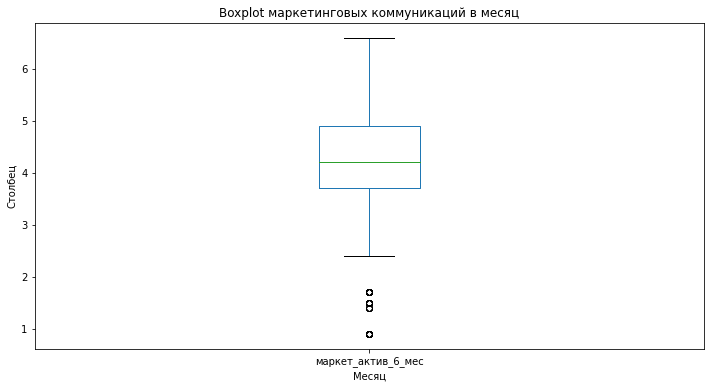

In [27]:
(market_file['маркет_актив_6_мес']
    .plot(kind='hist', bins=50, grid=True, figsize=(12, 6))
)
plt.title('Маркетинговые коммуникации в месяц')
plt.xlabel('Месяц')
plt.ylabel('Кол-во')
plt.show()

(market_file['маркет_актив_6_мес']
    .plot(kind='box', figsize=(12, 6))
)
plt.title('Boxplot маркетинговых коммуникаций в месяц')
plt.xlabel('Месяц')
plt.ylabel('Столбец')
plt.show()

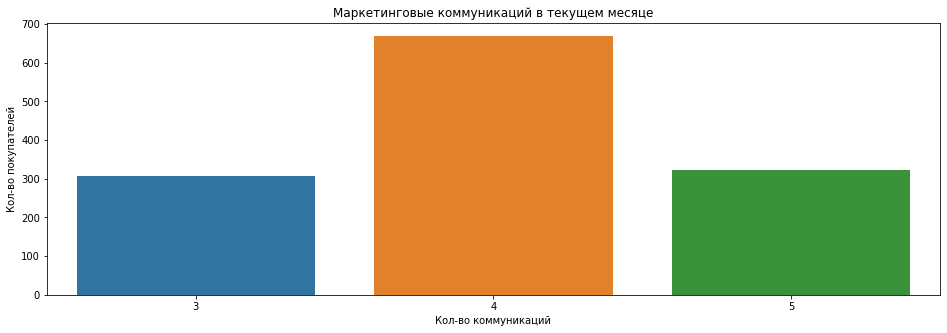

In [28]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.countplot(x = 'маркет_актив_тек_мес', data =  market_file)
plt.title('Маркетинговые коммуникаций в текущем месяце')
plt.xlabel('Кол-во коммуникаций')
plt.ylabel('Кол-во покупателей')
plt.show()
plt.show();

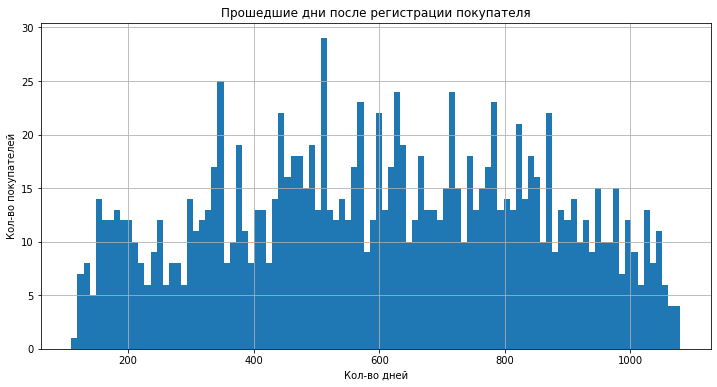

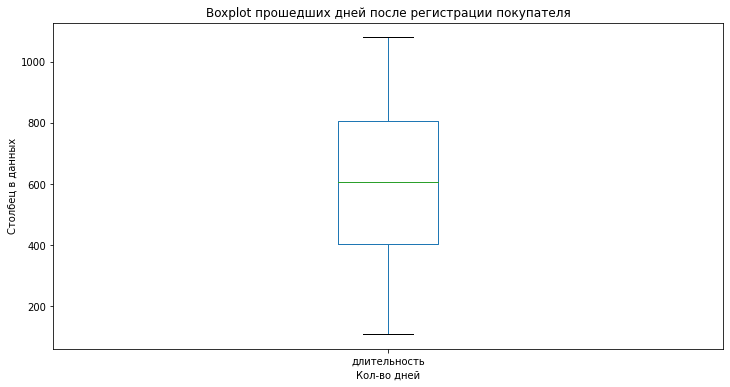

In [29]:
(market_file['длительность']
    .plot(kind='hist', bins=100, grid=True, figsize=(12, 6))
)
plt.title('Прошедшие дни после регистрации покупателя')
plt.xlabel('Кол-во дней')
plt.ylabel('Кол-во покупателей')
plt.show()

(market_file['длительность']
    .plot(kind='box', figsize=(12, 6))
)
plt.title('Boxplot прошедших дней после регистрации покупателя')
plt.xlabel('Кол-во дней')
plt.ylabel('Столбец в данных')
plt.show()

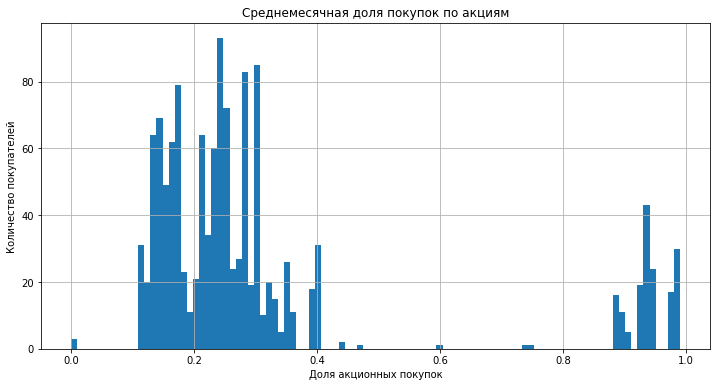

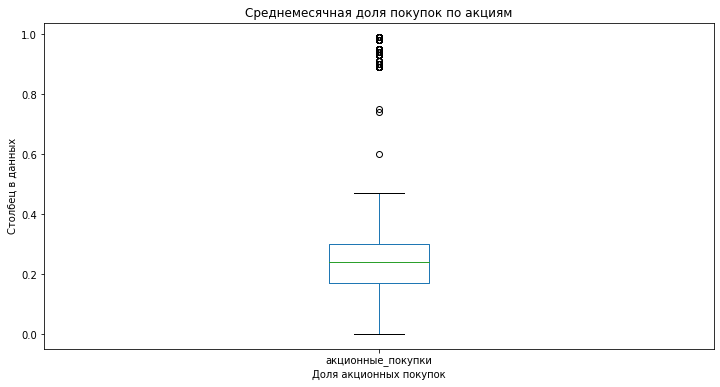

In [30]:
(market_file['акционные_покупки']
    .plot(kind='hist', bins=100, grid=True, figsize=(12, 6))
)
plt.title('Среднемесячная доля покупок по акциям')
plt.xlabel('Доля акционных покупок')
plt.ylabel('Количество покупателей')
plt.show()

(market_file['акционные_покупки']
    .plot(kind='box', figsize=(12, 6))
)
plt.title('Среднемесячная доля покупок по акциям')
plt.xlabel('Доля акционных покупок')
plt.ylabel('Столбец в данных')
plt.show()

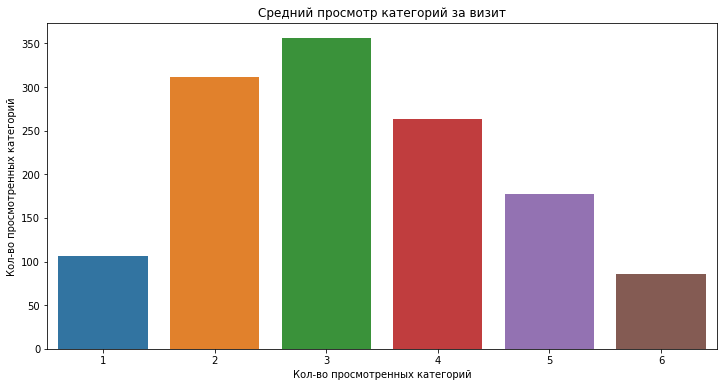

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x = 'средний_просмотр_категорий_за_визит', data =  market_file)
plt.title('Средний просмотр категорий за визит')
plt.xlabel('Кол-во просмотренных категорий')
plt.ylabel('Кол-во просмотренных категорий')
plt.show()
plt.show();

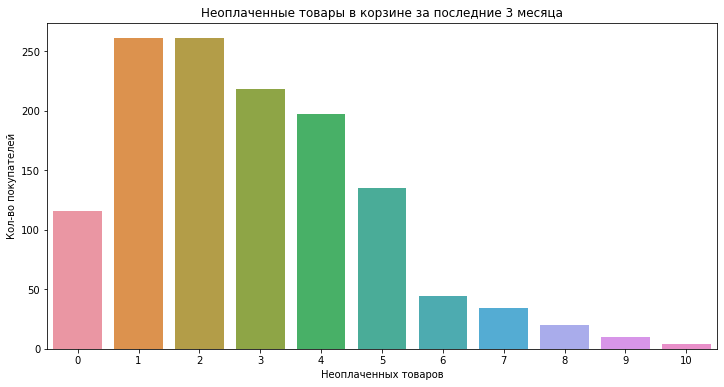

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x = 'неоплаченные_продукты_штук_квартал', data =  market_file)
plt.title('Неоплаченные товары в корзине за последние 3 месяца')
plt.xlabel('Неоплаченных товаров')
plt.ylabel('Кол-во покупателей')
plt.show()
plt.show();

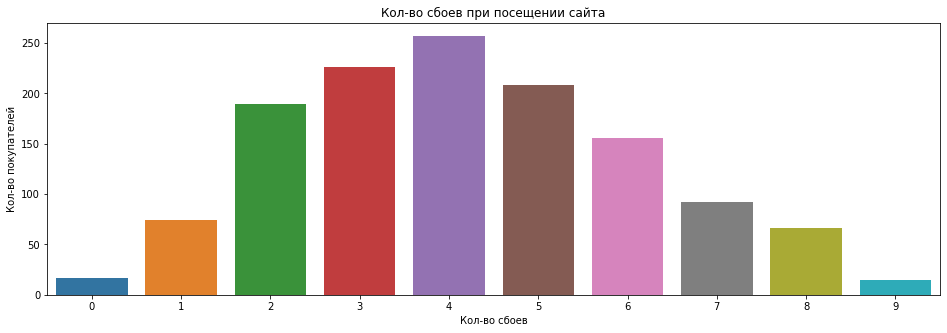

In [33]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.countplot(x = 'ошибка_сервиса', data =  market_file)
plt.title('Кол-во сбоев при посещении сайта')
plt.xlabel('Кол-во сбоев')
plt.ylabel('Кол-во покупателей')
plt.show()
plt.show();

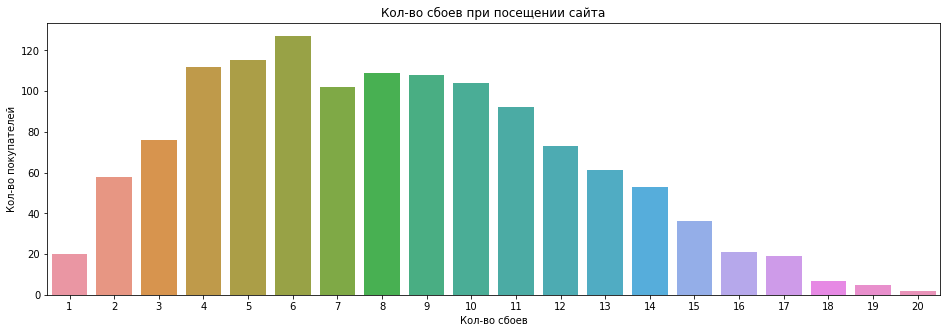

In [34]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.countplot(x = 'страниц_за_визит', data =  market_file)
plt.title('Кол-во сбоев при посещении сайта')
plt.xlabel('Кол-во сбоев')
plt.ylabel('Кол-во покупателей')
plt.show()
plt.show();

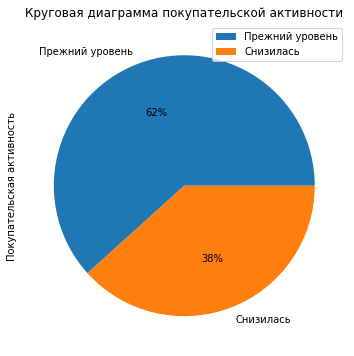

In [35]:
(market_file
    .pivot_table(index='покупательская_активность',values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(12, 6), 
              label='Покупательская активность')
)
plt.title('Круговая диаграмма покупательской активности')
plt.show()

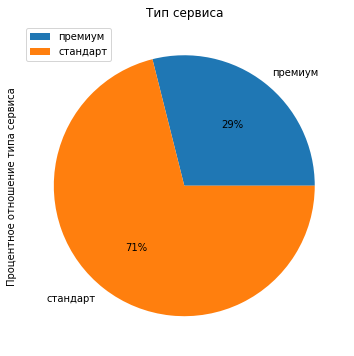

In [36]:
(market_file
    .pivot_table(index='тип_сервиса',values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(12, 6), 
              label='Процентное отношение типа сервиса')
)
plt.title('Тип сервиса')
plt.show()

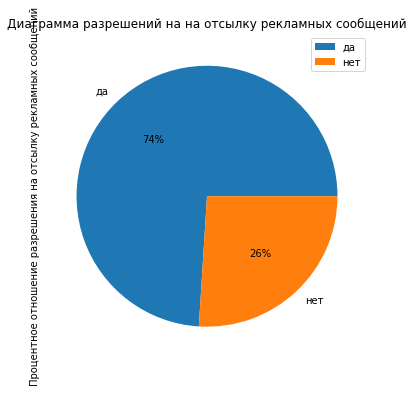

In [37]:
(market_file
    .pivot_table(index='разрешить_сообщать',values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(12, 6), 
              label='Процентное отношение разрешения на отсылку рекламных сообщений')
)
plt.title('Диаграмма разрешений на на отсылку рекламных сообщений')
plt.show()

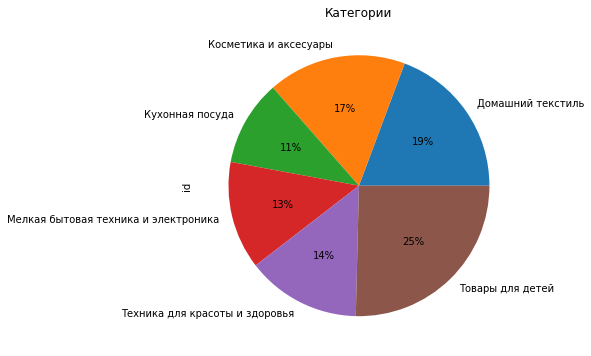

In [38]:
(market_file
    .pivot_table(index='популярная_категория',values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(12, 6))              
)
plt.title('Категории')
plt.legend().remove()
plt.show()

###### Промежуточный вывод по анализу датасета market_file:

* Данные в основном имеют нормальное распределение. Не найдено аномалий
* В данных встречаются выбросы, их можно связать как с возможными ошибками, так и с сезонностью продаж или человеческим фактором (особенности разных клиентов). 
* Например, признак акционные покупки похож на бимодальное распределение, это нормально, учитывая особенность фактора
* Самая популярная категория товара за последние 6 месяцев - Товары для детей, далее идет Домашний текстиль и Косметика и аксессуары. Самая непопулярная категория - Кухонная посуда. 
* 74% клиентов согласились на рекламную рассылку
* 71% клиентов имеют стандартный тип сервиса
* 62% сохранили покупательную активность

Анализируем market_money

Выбираем клиентов с покупательской активностью не менее трех месяцев. 

In [39]:
market_money = market_money[market_money.id.isin(market_money.query('выручка==0')['id'].unique())==False] 
market_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 3 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3891 non-null   int64  
 1   период   3891 non-null   object 
 2   выручка  3891 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.6+ KB


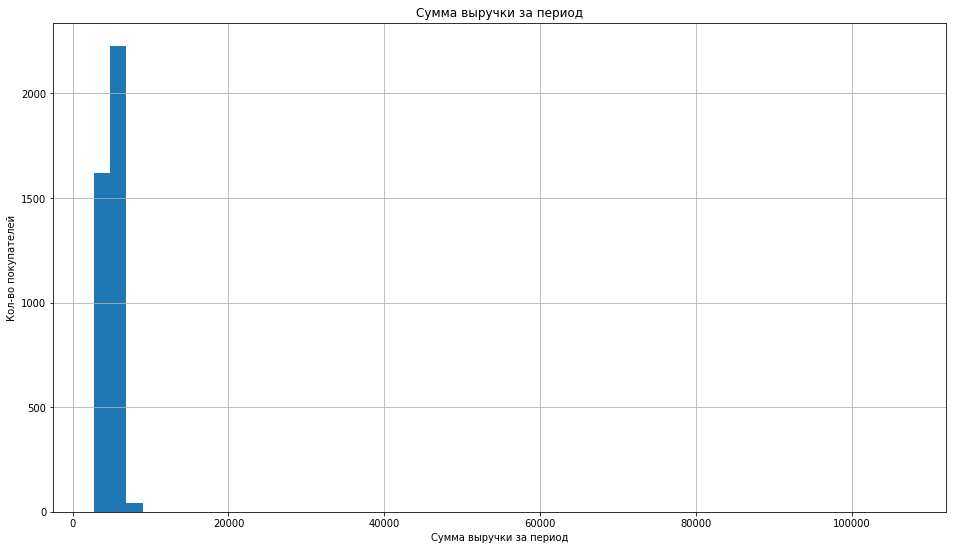

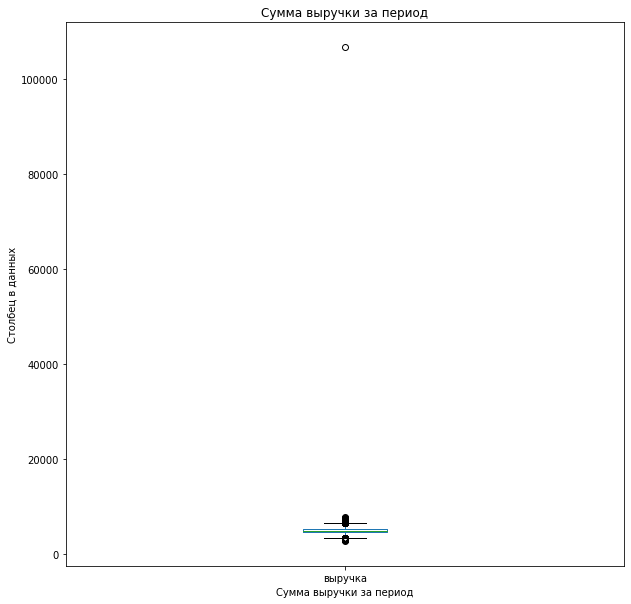

In [40]:
(market_money['выручка']
    .plot(kind='hist', bins=50, grid=True, figsize=(16, 9))
)
plt.title('Сумма выручки за период')
plt.xlabel('Сумма выручки за период')
plt.ylabel('Кол-во покупателей')
plt.show()

(market_money['выручка']
    .plot(kind='box', figsize=(10, 10))
)
plt.title('Сумма выручки за период')
plt.xlabel('Сумма выручки за период')
plt.ylabel('Столбец в данных')
plt.show()

In [41]:
market_money.sort_values(by='выручка', ascending=False).head()

,id,период,выручка
98,215380,текущий_месяц,"106,862.20"
435,215493,текущий_месяц,"7,799.40"
262,215435,текущий_месяц,"7,605.30"
1481,215841,текущий_месяц,"7,557.00"
2388,216144,текущий_месяц,"7,547.80"


Нашла аномальное значение. Возможно, это техническая ошибка или человеческий фактор. А может быть какая-то оптовая закупка. В любом случае, мне кажется, необходимо продолжать обрабатывать значения начиная с 7 799

In [42]:
market_money = market_money[market_money['выручка'] < 8000]

In [43]:
market_money.sort_values(by='выручка', ascending=False).head()

,id,период,выручка
435,215493,текущий_месяц,"7,799.40"
262,215435,текущий_месяц,"7,605.30"
1481,215841,текущий_месяц,"7,557.00"
2388,216144,текущий_месяц,"7,547.80"
566,215536,текущий_месяц,"7,467.90"


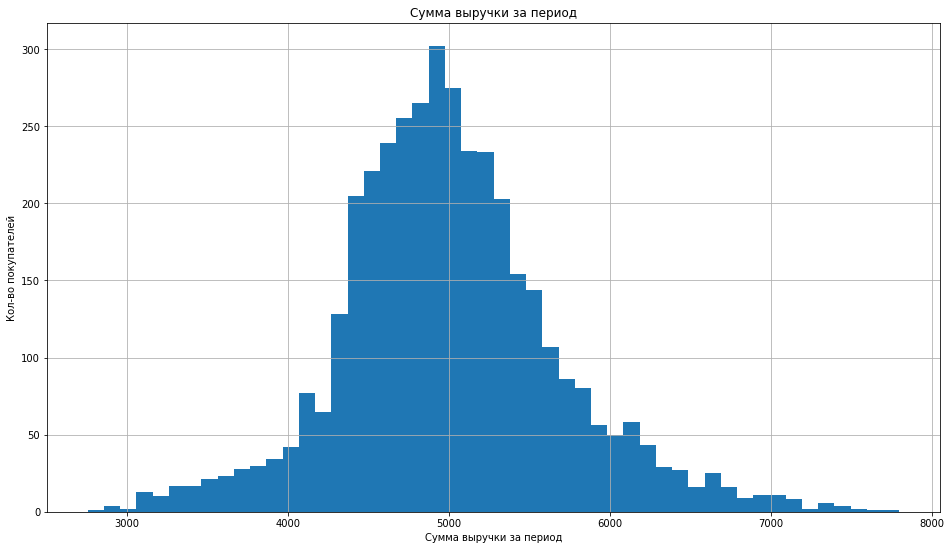

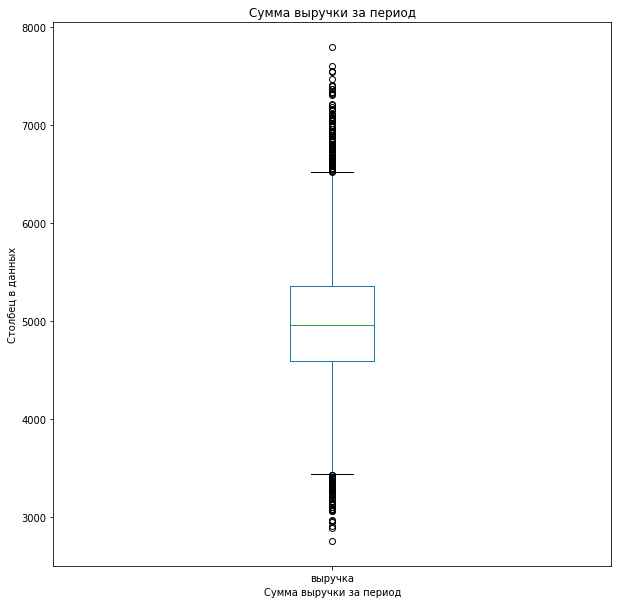

In [44]:
(market_money['выручка']
    .plot(kind='hist', bins=50, grid=True, figsize=(16, 9))
)
plt.title('Сумма выручки за период')
plt.xlabel('Сумма выручки за период')
plt.ylabel('Кол-во покупателей')
plt.show()

(market_money['выручка']
    .plot(kind='box', figsize=(10, 10))
)
plt.title('Сумма выручки за период')
plt.xlabel('Сумма выручки за период')
plt.ylabel('Столбец в данных')
plt.show()

In [45]:
market_money['выручка'].describe()

count   3,890.00
mean    5,007.54
std       679.24
min     2,758.70
25%     4,592.00
50%     4,959.00
75%     5,363.00
max     7,799.40
Name: выручка, dtype: float64

In [46]:
market_money['выручка'].describe()

count   3,890.00
mean    5,007.54
std       679.24
min     2,758.70
25%     4,592.00
50%     4,959.00
75%     5,363.00
max     7,799.40
Name: выручка, dtype: float64

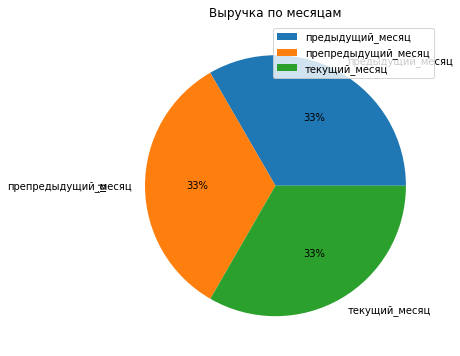

In [47]:
(market_money
    .pivot_table(index='период', values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(12, 6), 
             )
)
plt.title('Выручка по месяцам')
plt.show()

In [48]:
market_money['id'].nunique()

1297

###### Промежуточные выводы по анализу market_money

* Убрали аномальное значение, которое  может быть вызвано технической ошибкой или особенностью покупки (опт или другое). После этого действия график выручки выглядит нормально. 
* в соответствии с заданием отсортировали клиентов, которые делали покупки все три месяца
* уникальных id в датасете 1297, то есть датасет дает для каждого id информацию по покупкам за три месяца


Анализируем market_time и money

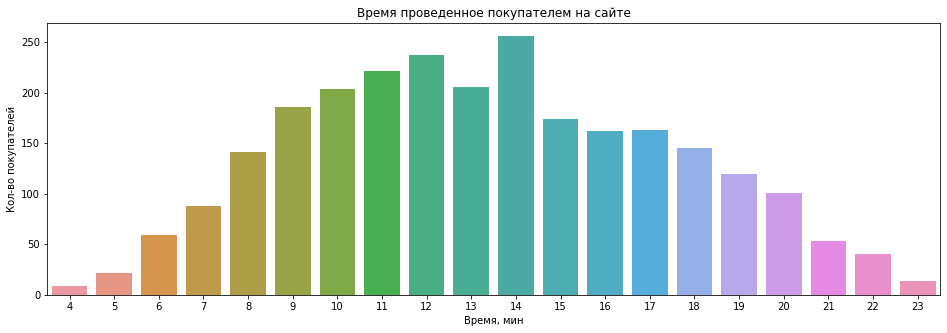

In [49]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.countplot(x = 'минут', data =  market_time)
plt.title('Время проведенное покупателем на сайте')
plt.xlabel('Время, мин')
plt.ylabel('Кол-во покупателей')
plt.show()
plt.show();

In [50]:
market_time['минут'].describe()

count   2,600.00
mean       13.34
std         4.08
min         4.00
25%        10.00
50%        13.00
75%        16.00
max        23.00
Name: минут, dtype: float64

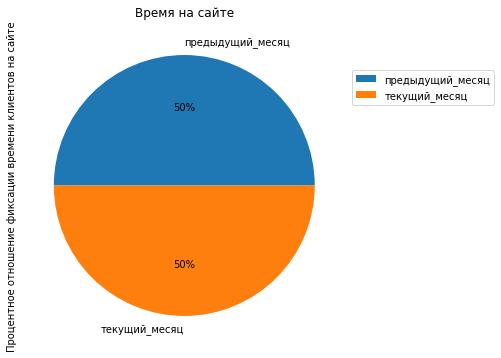

In [51]:
(market_time
    .pivot_table(index='период', values='id',aggfunc='count')
    .plot.pie(y='id', autopct='%1.0f%%', figsize=(12, 6), 
              label='Процентное отношение фиксации времени клиентов на сайте')
)
plt.title('Время на сайте')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()

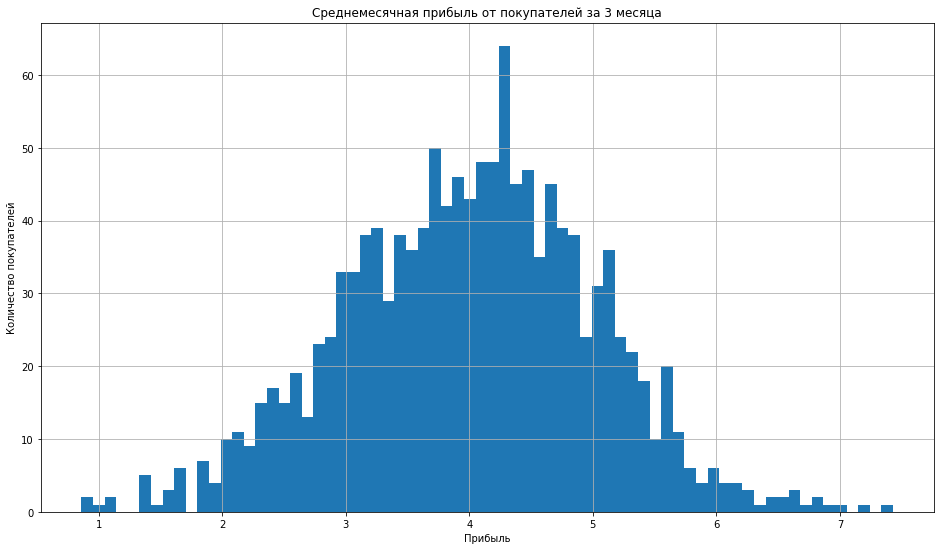

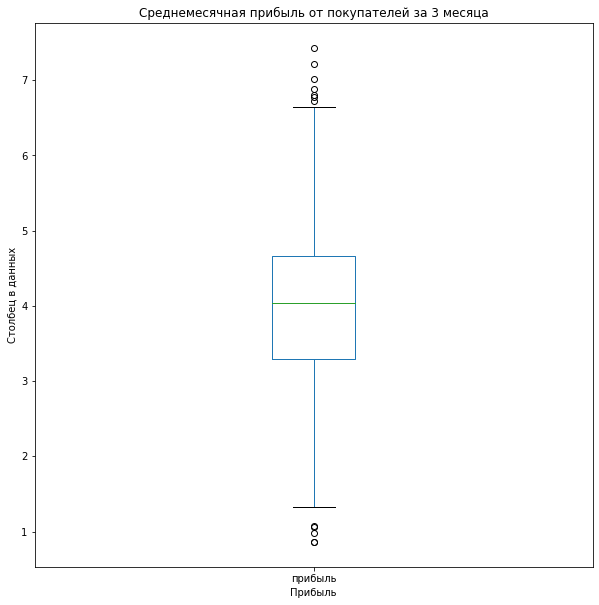

In [52]:
(money['прибыль']
    .plot(kind='hist', bins=70, grid=True, figsize=(16, 9))
)
plt.title('Среднемесячная прибыль от покупателей за 3 месяца')
plt.xlabel('Прибыль')
plt.ylabel('Количество покупателей')
plt.show()

(money['прибыль']
    .plot(kind='box', figsize=(10, 10))
)
plt.title('Среднемесячная прибыль от покупателей за 3 месяца')
plt.xlabel('Прибыль')
plt.ylabel('Столбец в данных')
plt.show()

###### Промежуточные выводы по исследованию данных:

* Данные в основном имеют нормальное распределение.
* В данных встречаются выбросы, их можно связать как с возможными ошибками, так и с сезонностью продаж или человеческим фактором (особенности разных клиентов).
* Например, признак акционные покупки похож на бимодальное распределение, это нормально, учитывая особенность фактора
* В market_money убрали аномальное значение, которое может быть вызвано технической ошибкой или особенностью покупки (опт или другое). После этого действия график выручки выглядит нормально.
* Самая популярная категория товара за последние 6 месяцев - Товары для детей, далее идет Домашний текстиль и Косметика и аксессуары. Самая непопулярная категория - Кухонная посуда.
* 74% клиентов согласились на рекламную рассылку
* 71% клиентов имеют стандартный тип сервиса
* 62% сохранили покупательную активность
* в соответствии с заданием отсортировали клиентов, которые делали покупки все три месяца
* уникальных id в датасете 1297, то есть датасет дает для каждого id информацию по покупкам за три месяца
* Датасет money содержит данные об условных показателях прибыли с каждого клиента. Количественные признаки нормально распределены, нет выбросов, нет аномалий.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Хорошая работа в части исследования данных: молодец, что используешь функции, а также применяешь подходящие для типов данных инструменты.</font>

 ## Объединение таблиц

In [53]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

In [54]:
market_file.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.40,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.40,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.90,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.20,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.10,3,1064,0.94,Товары для детей,3,2,3,2


In [55]:
display(market_money.head())
market_money.info()

,id,период,выручка
3,215349,препредыдущий_месяц,"4,472.00"
4,215349,текущий_месяц,"4,971.60"
5,215349,предыдущий_месяц,"5,216.00"
6,215350,препредыдущий_месяц,"4,826.00"
7,215350,текущий_месяц,"5,058.40"


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3890 entries, 3 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3890 non-null   int64  
 1   период   3890 non-null   object 
 2   выручка  3890 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.6+ KB


In [56]:
market_money = market_money.pivot_table(index='id', columns='период', values='выручка')
market_money.columns = ['выручка_текущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_предыдущий_месяц']
market_money.head()

,выручка_текущий_месяц,выручка_препредыдущий_месяц,выручка_предыдущий_месяц
id,,,
215349,"5,216.00","4,472.00","4,971.60"
215350,"5,457.50","4,826.00","5,058.40"
215351,"6,158.00","4,793.00","6,610.40"
215352,"5,807.50","4,594.00","5,872.50"
215353,"4,738.50","5,124.00","5,388.50"


In [57]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 215349 to 216647
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   выручка_текущий_месяц        1297 non-null   float64
 1   выручка_препредыдущий_месяц  1297 non-null   float64
 2   выручка_предыдущий_месяц     1296 non-null   float64
dtypes: float64(3)
memory usage: 40.5 KB


In [58]:
market_money.isna().sum()

выручка_текущий_месяц          0
выручка_препредыдущий_месяц    0
выручка_предыдущий_месяц       1
dtype: int64

In [59]:
market_money = market_money.dropna()

In [60]:
market_time = market_time.pivot_table(index='id', columns='период', values='минут')
market_time.columns = ['минут_предыдущий_месяц', 'минут_текущий_месяц']
print(market_time.head())

        минут_предыдущий_месяц  минут_текущий_месяц
id                                                 
215348                      13                   14
215349                      12                   10
215350                       8                   13
215351                      11                   13
215352                       8                   11


In [61]:
market_time.isna().sum()

минут_предыдущий_месяц    0
минут_текущий_месяц       0
dtype: int64

In [62]:
data_market = pd.merge(market_money, pd.merge(market_time, market_file, on='id', sort=True), on='id', sort=True)
print(data_market.info())
data_market.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   выручка_текущий_месяц                1296 non-null   float64
 2   выручка_препредыдущий_месяц          1296 non-null   float64
 3   выручка_предыдущий_месяц             1296 non-null   float64
 4   минут_предыдущий_месяц               1296 non-null   int64  
 5   минут_текущий_месяц                  1296 non-null   int64  
 6   покупательская_активность            1296 non-null   object 
 7   тип_сервиса                          1296 non-null   object 
 8   разрешить_сообщать                   1296 non-null   object 
 9   маркет_актив_6_мес                   1296 non-null   float64
 10  маркет_актив_тек_мес                 1296 non-null   int64  
 11  длительность                  

,id,выручка_текущий_месяц,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215349,"5,216.00","4,472.00","4,971.60",12,10,Снизилась,премиум,да,4.40,4,819,0.75,Товары для детей,4,4,2,5
1,215350,"5,457.50","4,826.00","5,058.40",8,13,Снизилась,стандарт,нет,4.90,3,539,0.14,Домашний текстиль,5,2,1,5
2,215351,"6,158.00","4,793.00","6,610.40",11,13,Снизилась,стандарт,да,3.20,5,896,0.99,Товары для детей,5,0,6,4
3,215352,"5,807.50","4,594.00","5,872.50",8,11,Снизилась,стандарт,нет,5.10,3,1064,0.94,Товары для детей,3,2,3,2
4,215353,"4,738.50","5,124.00","5,388.50",10,10,Снизилась,стандарт,да,3.30,4,762,0.26,Домашний текстиль,4,1,1,4


In [63]:
data_market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   выручка_текущий_месяц                1296 non-null   float64
 2   выручка_препредыдущий_месяц          1296 non-null   float64
 3   выручка_предыдущий_месяц             1296 non-null   float64
 4   минут_предыдущий_месяц               1296 non-null   int64  
 5   минут_текущий_месяц                  1296 non-null   int64  
 6   покупательская_активность            1296 non-null   object 
 7   тип_сервиса                          1296 non-null   object 
 8   разрешить_сообщать                   1296 non-null   object 
 9   маркет_актив_6_мес                   1296 non-null   float64
 10  маркет_актив_тек_мес                 1296 non-null   int64  
 11  длительность                  

###### Промежуточные выводы:

Данные из датасетов объединили в один - data_market

из столбца выручка датасета market_money сделали столбцы: 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'выручка_предыдущий_месяц'

из столбца минут датасета market_time  сделали столбцы: 'минут_предыдущий_месяц', 'минут_текущий_месяц'


 ## Корреляционный анализ

In [64]:
data_market = data_market.sort_values(by=['id']).set_index('id')

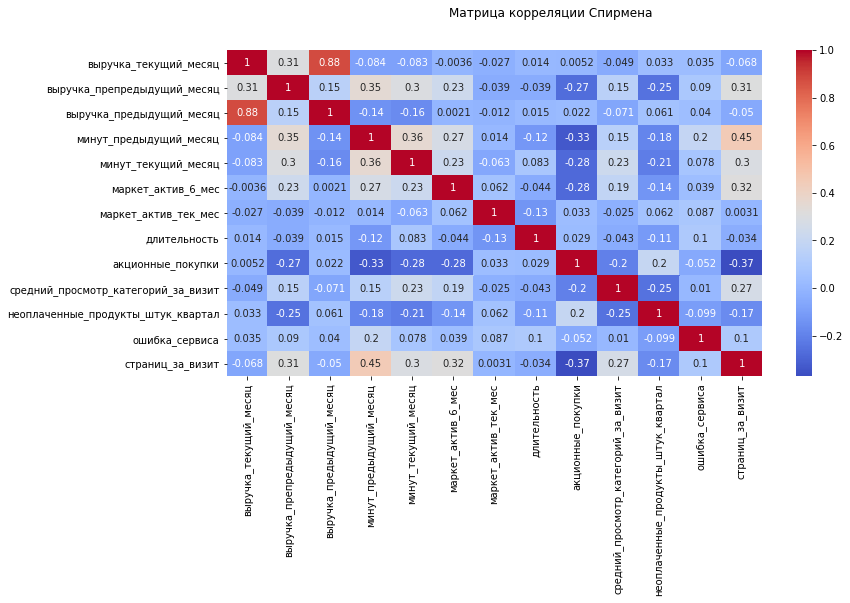

In [65]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.suptitle('Матрица корреляции Спирмена')
sns.heatmap(data_market.corr(method="spearman"), annot=True, cmap='coolwarm');

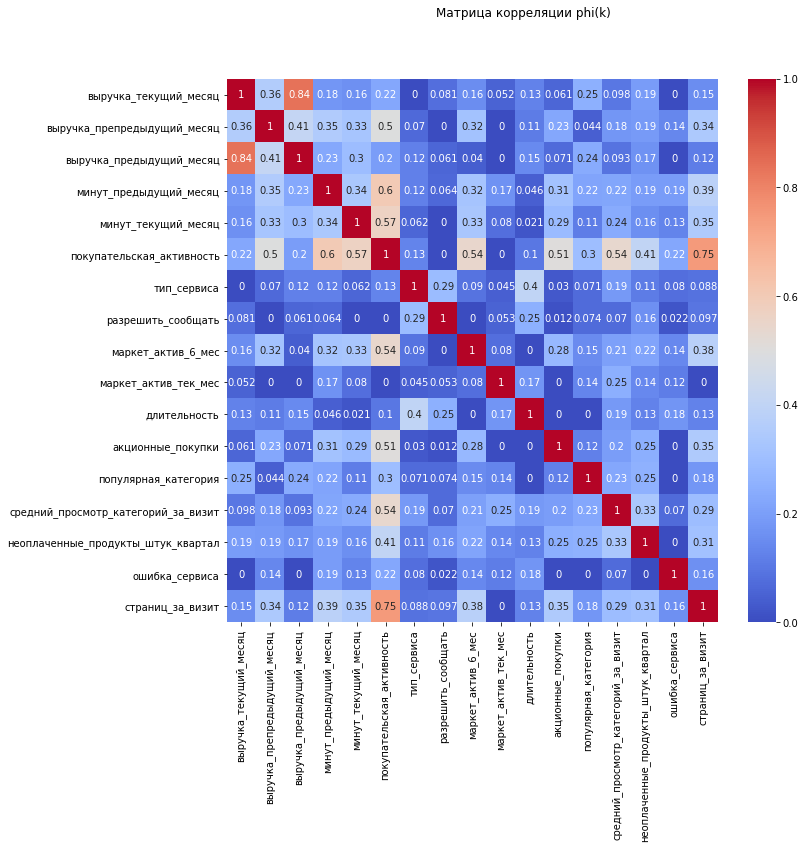

In [66]:
num_columns = ['выручка_препредыдущий_месяц','выручка_предыдущий_месяц', 'выручка_текущий_месяц','длительность','акционные_покупки', 'маркет_актив_6_мес']
fig, ax = plt.subplots(figsize=(11, 10))
plt.suptitle('Матрица корреляции phi(k)')
sns.heatmap(data_market.phik_matrix(interval_cols=num_columns), annot=True, cmap='coolwarm');

###### Промежуточные выводы:

Мультиколлинеарность не обнаружена, значений коэффициента корреляции Спирмена от 0.9 до 0.95 нет.
Максимальное значение корреляции Спирмена - 0,88 - между выручкой за текущий и предыдщуий месяц, и корреляция по phi(k) между ними 0,84.
Также по phi(k) отметить можно корреляцию 0,75 (покупательская_активность  и страниц_за_визит)

## Использование пайплайнов

Подготовим данные и закодируем признак покупательской активности. Сделаем списки категориальных и упорядоченных признков для OHE и ORD кодировки.  Сделаем пайплайн для подготовки признаков из ohe_columns: заполним пропуски и применим OHE-кодирование (SimpleImputer и OHE), а такжепайплайн для подготовки признаков из ord_columns: заполним пропуски и применим Ordinal-кодирование
(SimpleImputer и OE)

In [67]:
RANDOM_STATE = 42
TEST_SIZE = 0.25
X = data_market.drop(['покупательская_активность'], axis=1)
y = data_market['покупательская_активность']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify = y)

display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

le = LabelEncoder()
le.fit_transform(y_train.unique())
print (le.classes_, le.transform(le.classes_))
y_train = le.transform(y_train)
y_test = le.transform(y_test)

(972, 16)

(324, 16)

(972,)

(324,)

['Прежний уровень' 'Снизилась'] [0 1]


<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [68]:
ohe_columns = ['популярная_категория']
ord_columns = ['тип_сервиса', 'разрешить_сообщать']
num_columns = ['выручка_препредыдущий_месяц',       
               'выручка_предыдущий_месяц',          
               'выручка_текущий_месяц',             
               'минут_предыдущий_месяц',            
               'минут_текущий_месяц',               
               'маркет_актив_тек_мес',                
               'длительность',                        
               'акционные_покупки',                   
               'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал',  
               'ошибка_сервиса',                      
               'страниц_за_визит']
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'],
                    ['да', 'нет'],
                    
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

Обучим четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(). В задании попросили выбрать метрику, я выбрала ROC-AUC, так как это показатель, который оценивает работу модели более обобщённо, независимо от порога классификации.Кривая ROC отображает частоту истинных положительных результатов (TPR) по сравнению с частотой ложноположительных результатов (FPR) при различных пороговых значениях классификации, а AUC показывает совокупную меру производительности модели машинного обучения по всем возможным порогам классификации.

In [69]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 9),
        'models__max_features': range(2, 9),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    

    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 9),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },


    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)], 
        'models__C': [0.1, 1, 10], 
        'models__kernel': ['linear', 'rbf'], 
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)


y_test_pred_proba = randomized_search.predict_proba(X_test)


y_test_pred = y_test_pred_proba[:, 1]


print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
           

По результатам лучшим вариантом модели оказалась SVC

###### Промежуточные выводы:

Подготовили данные и закодировали признак покупательской активности. Сделали пайплайн для подготовки признаков из ohe_columns: применили OHE-кодирование (SimpleImputer + OHE), а такжепайплайн для подготовки признаков из ord_columns: применили Ordinal-кодирование (SimpleImputer + OE)
Обучили четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC().А качестве метрики выбрали ROC-AUC, так как это показатель, который оценивает работу модели более обобщённо, независимо от порога классификации.Кривая ROC отображает частоту истинных положительных результатов (TPR) по сравнению с частотой ложноположительных результатов (FPR) при различных пороговых значениях классификации, а AUC показывает совокупную меру производительности модели машинного обучения по всем возможным порогам классификации.

По результатам лучшей моделью оказалась SVC, значение  ROC-AUC на тестовой выборке - 0,91


## Анализ важности признаков

In [70]:
best_model = randomized_search.best_estimator_
data_preprocessor = best_model.named_steps['preprocessor']

pipeline_fin_version = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models',  SVC(C=10, probability=True, random_state=RANDOM_STATE))
]).fit(X_train, y_train)

X_train_trans = pd.DataFrame(data_preprocessor.transform(X_train), columns=data_preprocessor.get_feature_names_out())
X_test_trans = pd.DataFrame(data_preprocessor.transform(X_test), columns=data_preprocessor.get_feature_names_out())
explainer = shap.KernelExplainer(best_model.named_steps['models'].predict, shap.sample(X_train_trans, 100))
shap_values = explainer.shap_values(X_test_trans, nsamples=50)

  0%|          | 0/324 [00:00<?, ?it/s]

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=3.735e-03, with an active set of 7 regressors, and the smallest cholesky pivot element being 3.650e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=2.875e-03, with an active set of 5 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=1.561e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.10

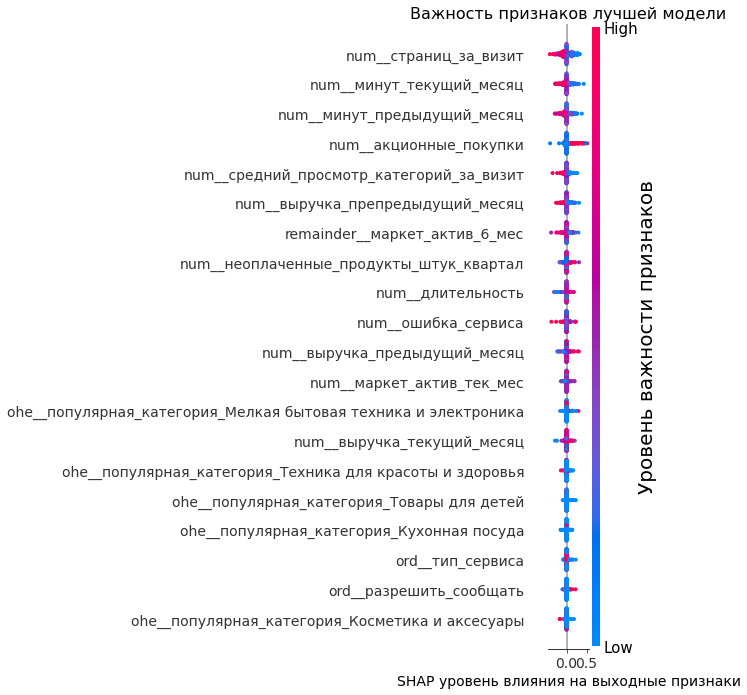

In [71]:
shap.initjs()
shap.summary_plot(shap_values, X_test_trans, show=False)

 
fig, ax = plt.gcf(), plt.gca()

 
ax.tick_params(labelsize=14)
ax.set_xlabel("SHAP уровень влияния на выходные признаки", fontsize=14)
ax.set_title('Важность признаков лучшей модели', fontsize=16)

 
cb_ax = fig.axes[1] 

 
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel("Уровень важности признаков", fontsize=20)

plt.show()

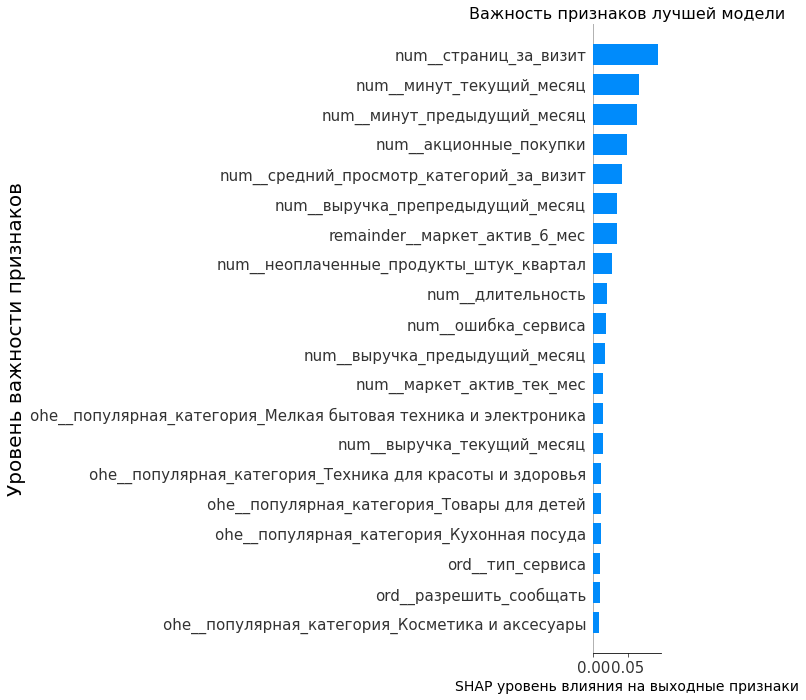

In [72]:
shap.initjs()
shap.summary_plot(shap_values, X_test_trans, plot_type='bar', show=False)

fig, ax = plt.gcf(), plt.gca()
ax.tick_params(labelsize=14)
ax.set_xlabel("SHAP уровень влияния на выходные признаки", fontsize=14)
ax.set_title('Важность признаков лучшей модели', fontsize=16)
cb_ax = fig.axes[0] 
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel("Уровень важности признаков", fontsize=20)
plt.show();

###### Промежуточные выводы

Посмотрели значимость признаков с помощью метода SHAP. На графике видно, что опережает признак 'Страниц за визит', далее 'минут_предыдущий_месяц' и 'минут_текущий_месяц'.Если их не учитывать, качество модели будет хуже.

Менее значимые признаки - это популярные категории, ошибка сервиса, маркетинговая активность за текущий месяц и тд. 

## Сегментация покупателей

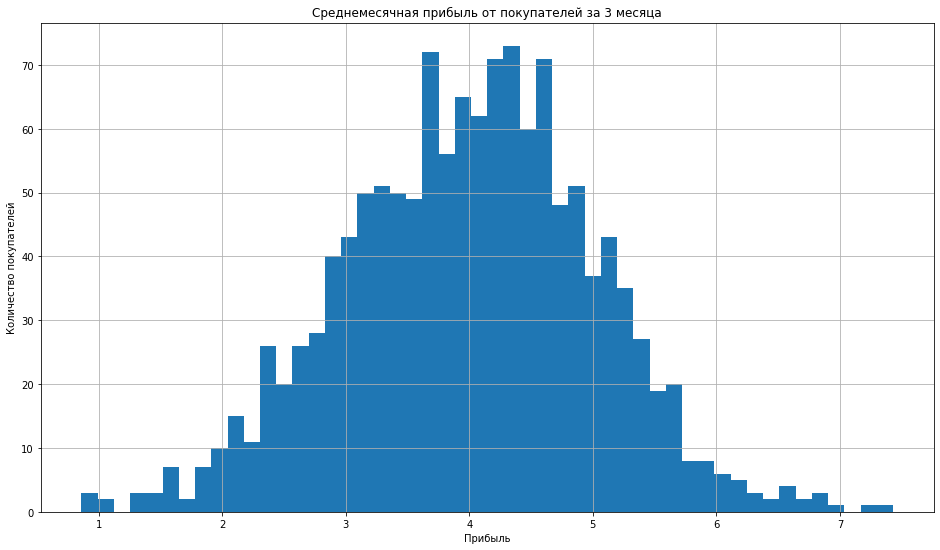

In [73]:
(money['прибыль']
    .plot(kind='hist', bins=50, grid=True, figsize=(16, 9))
)
plt.title('Среднемесячная прибыль от покупателей за 3 месяца')
plt.xlabel('Прибыль')
plt.ylabel('Количество покупателей')
plt.show()

In [74]:
std_income = np.std(money['прибыль'])
mediana_income = money['прибыль'].median()
print("Стандартное отклонение : ", std_income)
money['прибыль'].describe()

Стандартное отклонение :  1.0133321434255445


count   1,300.00
mean        4.00
std         1.01
min         0.86
25%         3.30
50%         4.04
75%         4.67
max         7.43
Name: прибыль, dtype: float64

Мы должны найти клиентов, у которых снизилась покупательская активность и придумать, как их удержать.

По графику можно заметить, что тип распределения параметра прибыли - нормальный.
Значит мы можем воспользоваться разбивкой на квантили, чтобы получить три выборки: маленький доход (до 0,25 квантиля), нормальный (между 0,25 и 0,75) и большой (после 0,75). Распределим это и впишем в датасет, а затем сольем таблицы. 
 
Посмотрим на график снижения покупательской активности и установим порог. После чего сравним несколько групп  

In [75]:
def predictions_func(X, threshold):
    n = pipeline_fin_version.predict_proba(X) 
    return (n[:, 1] > threshold).astype(int)

In [76]:
prediction_version = predictions_func(X, threshold=0.5)
X['predictions'] = prediction_version
X['probs'] = pipeline_fin_version.predict_proba(X)[:,1]

In [77]:
money['оценка_прибыли'] = money['прибыль'].apply(lambda x: 'маленькая' if x < (mediana_income - std_income) 
                                                       else ('большая' if x > (mediana_income + std_income) 
                                                       else 'нормальная'))

In [78]:
X = X.reset_index()
X = pd.merge(X, money, on='id', sort=True)
X.head()

,id,выручка_текущий_месяц,выручка_препредыдущий_месяц,выручка_предыдущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,...,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,predictions,probs,прибыль,оценка_прибыли
0,215349,"5,216.00","4,472.00","4,971.60",12,10,премиум,да,4.40,4,...,0.75,Товары для детей,4,4,2,5,1,0.96,4.16,нормальная
1,215350,"5,457.50","4,826.00","5,058.40",8,13,стандарт,нет,4.90,3,...,0.14,Домашний текстиль,5,2,1,5,1,0.71,3.13,нормальная
2,215351,"6,158.00","4,793.00","6,610.40",11,13,стандарт,да,3.20,5,...,0.99,Товары для детей,5,0,6,4,1,0.92,4.87,нормальная
3,215352,"5,807.50","4,594.00","5,872.50",8,11,стандарт,нет,5.10,3,...,0.94,Товары для детей,3,2,3,2,1,0.98,4.21,нормальная
4,215353,"4,738.50","5,124.00","5,388.50",10,10,стандарт,да,3.30,4,...,0.26,Домашний текстиль,4,1,1,4,1,0.80,3.95,нормальная


In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   выручка_текущий_месяц                1296 non-null   float64
 2   выручка_препредыдущий_месяц          1296 non-null   float64
 3   выручка_предыдущий_месяц             1296 non-null   float64
 4   минут_предыдущий_месяц               1296 non-null   int64  
 5   минут_текущий_месяц                  1296 non-null   int64  
 6   тип_сервиса                          1296 non-null   object 
 7   разрешить_сообщать                   1296 non-null   object 
 8   маркет_актив_6_мес                   1296 non-null   float64
 9   маркет_актив_тек_мес                 1296 non-null   int64  
 10  длительность                         1296 non-null   int64  
 11  акционные_покупки             

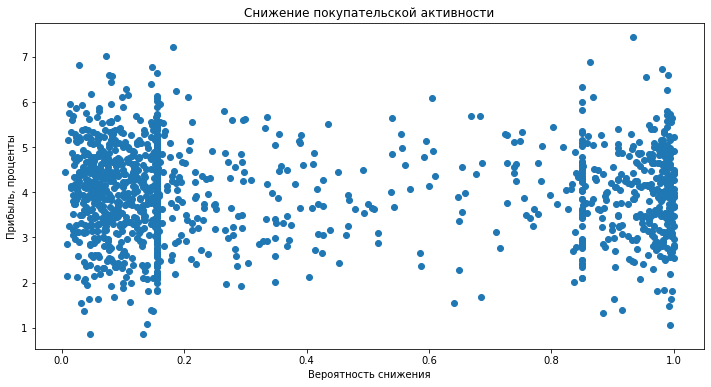

In [80]:
plt.figure(figsize=[12, 6])
plt.scatter(X.probs, X.прибыль);
plt.title('Снижение покупательской активности')
plt.xlabel('Вероятность снижения')
plt.ylabel('Прибыль, проценты')
plt.show()

График отображает провал посередине. Порог установим с 0,7. 
Построим график для клиентов с маленькой прибылью и высокой вероятностьюю снижения покупательской активности

In [81]:
X['снижение'] = X['probs'].apply(lambda x: 'Снизилась' if x > 0.7 else 'Прежний уровень') 

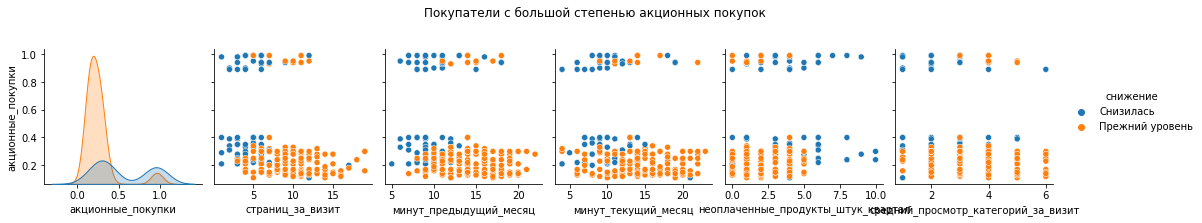

In [82]:
x=['акционные_покупки',
   'страниц_за_визит',
   'минут_предыдущий_месяц',
   'минут_текущий_месяц',
   'неоплаченные_продукты_штук_квартал',
   'средний_просмотр_категорий_за_визит']

y=['акционные_покупки']

g = sns.pairplot(X.query('оценка_прибыли == "маленькая"'), hue='снижение', x_vars=x, y_vars=y)
g.fig.suptitle('Покупатели с большой степенью акционных покупок', y=1.2, fontsize=12)
plt.show()


Посмотрим также на сегмент клиентов с оставшимися товарами в корзине

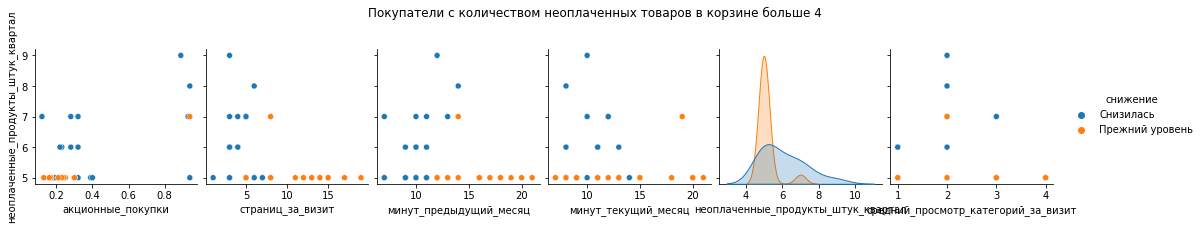

In [83]:
x=['акционные_покупки',
   'страниц_за_визит',
   'минут_предыдущий_месяц',
   'минут_текущий_месяц',
   'неоплаченные_продукты_штук_квартал',
   'средний_просмотр_категорий_за_визит']

y=['неоплаченные_продукты_штук_квартал']

g = sns.pairplot(X.query('оценка_прибыли == "большая" & неоплаченные_продукты_штук_квартал > 4'), hue='снижение', x_vars=x, y_vars=y)
g.fig.suptitle("Покупатели с количеством неоплаченных товаров в корзине больше 4", y=1.2, fontsize=12)
plt.show()

###### Промежуточные выводы

Снижение покупательской активности заметно как в группе клиентов, которые покупают мало акционных товаров, так и в группе клиентов с высокой прибыльностью и более 4 неоплаченных покупок в корзине.

* Группа клиентов, которые покупают мало акционных товаров: это говорит о том, что клиенты не вошли в число постоянных, возможно, они не достаточно осведомлены об акциях или их ничего не заинтересовало. По идее они должны делать больше 3 акционных покупок

Здесь можно предложитьувеличить количество рассылок с акциями таким клиентам, активнее уведомлять их об акциях с помощью маркетинговых инструментов. Также по графикам можно отметить, что если заинтересовать польователя сайтом, покупательская активность не снижается (при просмотре более 6 стр и проведении на сайте более 10 минут)


* Группа клиентов с высокой прибылью и более 4 неоплаченных покупок в корзине: возможно, клиенты отвлекаются и забывают, что у них в корзине находится товар, а возможно сохраняют его себе таким образом ожидая понижения на него цены, например. Можно присылать им напоминалки о забытых в корзине вещах и предлагать персональные скидки. Эффективнее всего будет тоже возвращать их на сайт, так как все вышесказанное про другую группу актуально и здесь

## Выводы

#### Цель: разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.
###### Для достижения цели была проведена следующая работа: 

Предобработка данных: Загрузили и первично осмотрели датасеты, результаты осмотра: 
* Пропуски в датасетах не обнаружены
* Явные дубликаты обнаружены в датасете market_money в количестве 5, они были удалены.
* Сделали изменения названий столбцов: названия переведены в строчный формат, пробелы в названиях столбцов в датасете market_file заменены на нижнее подчеркивание.
* Были найдены также неявные дубликаты в датасете market_file, они исправлены
* Исправлена опечатка в датасете market_time



Исследование:
* Данные в основном имеют нормальное распределение.
* В данных встречаются выбросы, их можно связать как с возможными ошибками, так и с сезонностью продаж или человеческим фактором (особенности разных клиентов).
* Например, признак акционные покупки похож на бимодальное распределение, это нормально, учитывая особенность фактора
* В market_money убрали аномальное значение, которое может быть вызвано технической ошибкой или особенностью покупки (опт или другое). После этого действия график выручки выглядит нормально.
* Самая популярная категория товара за последние 6 месяцев - Товары для детей, далее идет Домашний текстиль и Косметика и аксессуары. Самая непопулярная категория - Кухонная посуда.
* 74% клиентов согласились на рекламную рассылку
* 71% клиентов имеют стандартный тип сервиса
* 62% сохранили покупательную активность
* в соответствии с заданием отсортировали клиентов, которые делали покупки все три месяца
* уникальных id в датасете 1297, то есть датасет дает для каждого id информацию по покупкам за три месяца
* Датасет money содержит данные об условных показателях прибыли с каждого клиента. Количественные признаки нормально распределены, нет выбросов, нет аномалий.

Затем данные из датасетов объединили в один - data_market

* из столбца выручка датасета market_money сделали столбцы: 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'выручка_предыдущий_месяц'
* из столбца минут датасета market_time  сделали столбцы: 'минут_предыдущий_месяц', 'минут_текущий_месяц'

Корреляция

* Мультиколлинеарность не обнаружена, значений коэффициента корреляции Спирмена от 0.9 до 0.95 нет. 
* Максимальное значение корреляции Спирмена - 0,88 - между выручкой за текущий и предыдщуий месяц
* корреляция по phi(k) между ними 0,84.
* Также по phi(k) отметить можно корреляцию 0,75 (покупательская_активность и страниц_за_визит)


Пайплайны

Подготовили данные и закодировали признак покупательской активности. Сделали пайплайн для подготовки признаков из ohe_columns: применили OHE-кодирование (SimpleImputer + OHE), а такжепайплайн для подготовки признаков из ord_columns: применили Ordinal-кодирование (SimpleImputer + OE) Обучили четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC().А качестве метрики выбрали ROC-AUC, так как это показатель, который оценивает работу модели более обобщённо, независимо от порога классификации.Кривая ROC отображает частоту истинных положительных результатов (TPR) по сравнению с частотой ложноположительных результатов (FPR) при различных пороговых значениях классификации, а AUC показывает совокупную меру производительности модели машинного обучения по всем возможным порогам классификации.

* По результатам лучшей моделью оказалась SVC, значение ROC-AUC на тестовой выборке - 0,91 

Анализ важности признаков

Посмотрели значимость признаков с помощью метода SHAP. На графике видно, что опережает признак 'Страниц за визит', далее 'минут_предыдущий_месяц' и 'минут_текущий_месяц'.Если их не учитывать, качество модели будет хуже.

Менее значимые признаки - это популярные категории, ошибка сервиса, маркетинговая активность за текущий месяц


Сегментация



Снижение покупательской активности заметно как в группе клиентов, которые покупают мало акционных товаров, так и в группе клиентов с высокой прибыльностью и более 4 неоплаченных покупок в корзине.

* Группа клиентов, которые покупают мало акционных товаров: это говорит о том, что клиенты не вошли в число постоянных, возможно, они не достаточно осведомлены об акциях или их ничего не заинтересовало.

Здесь можно предложитьувеличить количество рассылок с акциями таким клиентам, активнее уведомлять их об акциях с помощью маркетинговых инструментов. Также по графикам можно отметить, что если заинтересовать польователя сайтом, покупательская активность не снижается (при просмотре более 6 стр и проведении на сайте более 10 минут)


* Группа клиентов с высокой прибылью и более 4 неоплаченных покупок в корзине: возможно, клиенты отвлекаются и забывают, что у них в корзине находится товар, а возможно сохраняют его себе таким образом ожидая понижения на него цены, например. Можно присылать им напоминалки о забытых в корзине вещах и предлагать персональные скидки. Эффективнее всего будет тоже возвращать их на сайт, так как все вышесказанное про другую группу актуально и здесь